We have a *collection of datasets* that refer to some common subject. We can see the data as organized in a tabular manner, where each dataset is a column of data. Datsets are indexed, starting from 0. For instance, if data refers to countries, dataset 0 is a time period, dataset 1 is a economic value associated to the time period, and dataset 2 is a population value. Each column / dataset only takes numeric values.

The class `DataManager` stores the datasets using a tabular format as a *list of lists.* Data can be passed as an input list of lists or as a CVS file. The class offers a number of methods to access and modify the data, as well as to perform basic *statistical manipulation* and *graphical display* of the datasets.


In [131]:
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import random

class DataManager:
    
    def __init__(self, data_list=None, csv_file=None):
        '''Initial data can be provided by a list or by a csv_file. 
            A number of checks are made to ensure that inputs are correct.
            ...
        '''
        
        # Data can be passed as a list/tuple or lists/tuples 
        #
        if data_list != None:
                self.data = data_list.copy() 
                self.dataset_num = len(self.data)
                self.error_file = False
                self.error_args = False
        #
        # Data can be read from a csv file
        #
        elif csv_file != None:
            try:                          # opening the file can result into an error, try-except
                f_csv = open(csv_file)    # avoids program abortion but raises an exception instead
            except:
                print('File', csv_file, 'cannot be opened!')
                self.error_file = True
                return
            else:
                self.error_file = False
                self.error_args = False
            
                csv_reader = csv.reader(f_csv)
                
                # the cvs file is supposed to have a header, which is read to 
                # know the number of fields / datasets
                
                header = next(csv_reader)
                self.dataset_num = len(header)
                    
                self.data = [[]] * self.dataset_num
                for i in range(self.dataset_num):
                    self.data[i] = []
            
                for r in csv_reader:  
                    for i in range(self.dataset_num):
                        self.data[i].append(float(r[i]))
            finally:
                f_csv.close()
        #
        # If we get here, the arguments were wrong, an exception is raised
        else:
            print('Wrong arguments to the initializer!')
            self.error_args = True
    
    def add_data(self, dataset, new_data):
        ''' Takes as input a tuple/list of new data and adds it to the specified dataset'''
        self.data[dataset].extend(new_data)
        
    def get_data_num(self, dataset):
        '''Returns the current number of entries in the specified dataset'''
        return len(self.data[dataset])
        
    def print_data(self, dataset):
        '''Prints the set of raw data in dataset, no formatting'''
        print(self.data[dataset])
        
    def get_number_of_datasets(self):
        return self.dataset_num
    
    def get_data(self, dataset):
        '''Returns a list with with all the data in dataset, unsorted'''
        return self.data[dataset]
    
    
    def remove_data(self, to_remove, dataset):
        '''Takes a tuple/list of entries to_remove and removes it from dataset, 
        if the entry exists.'''
        for d in to_remove:
            if d in self.data[dataset]:
                self.data[dataset].pop(d)
    
    def is_file_error(self):
        return self.error_file
    
    def is_args_error(self):
        return self.error_args
    
    def get_average(self, dataset):
        '''Returns the arithmetic average of the data in dataset.'''
        if len(self.data[dataset]) == 0:
            return 0
        avg = sum(self.data[dataset]) / len(self.data[dataset])
        
        return avg
    
    def get_standard_deviation(self, dataset):
        '''Returns the standard deviations of the data in dataset.'''
        if len(self.data[dataset]) == 0:
            return 0
        std = 0
        avg = self.get_average(dataset)
        for d in self.data[dataset]:
            std += (d - avg) * (d - avg)   
        return math.sqrt(std / len(self.data[dataset]))
    
    def get_median(self, dataset):
        d = sorted(self.data[dataset])
        return d[(len(d)//2)]

    def get_linear_correlation(self, dataset1, dataset2):
        d1_avg = self.get_average(dataset1)
        d2_avg = self.get_average(dataset2)
        d1_std = self.get_standard_deviation(dataset1)
        d2_std = self.get_standard_deviation(dataset2)
        c = 0
        for i in range(len(self.data[dataset1])):
            t1 = (self.data[dataset1][i] - d1_avg) / d1_std
            t2 = (self.data[dataset2][i] - d2_avg) / d2_std
            c +=  t1 * t2 
        return c / (len(self.data[dataset1])-1)
        
        
    def plot_dataset(self, dataset, xlabel='', ylabel='', title=''):
        plt.figure() # creates a new figure, it could be invoked with figure(n) to recall figure n later on
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)   
        plt.plot(self.data[dataset])
        plt.show()
            
    def plot_multiple_datasets(self, dataset_list, xlabel='', ylabel='', title=''):
        plt.figure() # creates a new figure, it could be invoked with figure(n) to recall figure n later on
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)  
        for i in dataset_list:
            plt.plot(self.data[i])
        plt.show()
            
            
    def scatter_plot(self, dataset1, dataset2, xlabel='', ylabel='', title=''):
        plt.figure()
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)   
        plt.scatter(self.data[dataset1], self.data[dataset2], marker='.', s=5, color='r')
        
    def histogram(self, nbins, dataset):
        plt.figure()
        hist_data = plt.hist(self.data[dataset], nbins)
        #
        #print('Frequency, Bin interval:')
        freq_bin_data = []
        for i in range(nbins):
            freq_bin_data.append([hist_data[0][i], hist_data[1][i], hist_data[1][i+1]])
        return freq_bin_data


As a first step, let's create a *new class object* and read the data from a **CSV file** that contains 3 datasets, and let's make a general inspection of the data 

In [132]:
data = DataManager(csv_file='csv/price_list.csv')

if data.is_file_error() or data.is_args_error():
   print("Input correct values for the constructor")
else:
    print('Number of datasets:', data.get_number_of_datasets())
    for d in range(data.get_number_of_datasets()):
        print('\nNumber of data entries in dataset {}:'.format(d))
        data.print_data(d)


Number of datasets: 3

Number of data entries in dataset 0:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

Number of data entries in dataset 1:
[0.708478, 0.6473685772450384, 0.6011102363391411, 0.5627559594800667, 0.5403872534385242, 0.5170663096940814, 0.5786329632300619, 0.5280202494048907, 0.5377961694978812, 0.5248743180570329, 0.5863961707910175, 0.5608914101499013, 0.5646960863499731, 0.526208832593333, 0.440739328068094, 0.4095442253498885, 

The next step is to gather more precise information about the data, therefore, let's use afew of the methods computing **statistical indicators** to get some quantitative view on the different datasets

In [67]:
for d in range(data.get_number_of_datasets()):
    print('Dataset {}:'.format(d))
    print('   Average value: {:.3f}'.format(data.get_average(d)))
    print('   Standard deviation: {:.3f}'.format(data.get_standard_deviation(d)))
    print('   Median: {:.3f}'.format(data.get_median(d)))

Dataset 0:
   Average value: 50.500
   Standard deviation: 28.866
   Median: 51.000
Dataset 1:
   Average value: 0.432
   Standard deviation: 0.078
   Median: 0.418
Dataset 2:
   Average value: 0.997
   Standard deviation: 0.084
   Median: 0.995


Next descriptive step, in order to gather more insights, consists in representing the data in a graphical manner. Let's start by **plotting each dataset individually**. Remember that the first dataset is a set of contiguos time periods in this case.

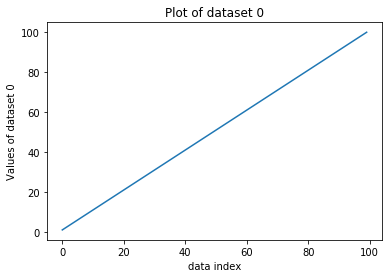

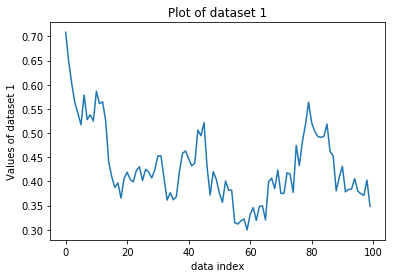

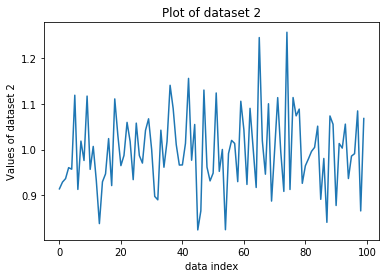

In [121]:
for d in range(data.get_number_of_datasets()):
    ylabel = 'Values of dataset ' + str(d)
    title = 'Plot of dataset ' + str(d)
    data.plot_dataset(d, xlabel='data index', ylabel=ylabel, title=title)

We can also **plot multiple datasets together!** However, the first dataset (0) is a set of contiguos time periods in this case, let's only plot the second and the third datasets.

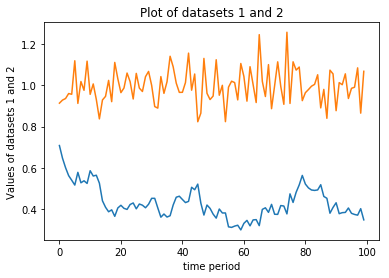

In [122]:
ylabel = 'Values of datasets 1 and 2'
title = 'Plot of datasets 1 and 2'
data.plot_multiple_datasets([1, 2], xlabel='time period', ylabel=ylabel, title=title)

Are there any correlations between the datasets? Let's investigate this by using the *linear correlation* method and by plotting a **scatter plot**

In [126]:
print('Value of linear correlation between datasets 1 and 2 is: {:.4f}'.format(
       data.get_linear_correlation(1,2)))


Value of linear correlation between datasets 1 and 2 is: -0.3233


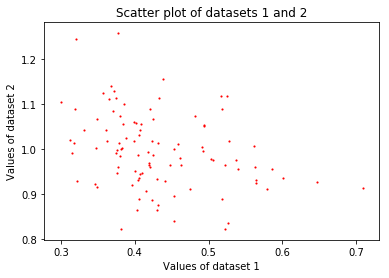

In [133]:
ylabel = 'Values of dataset 2'
xlabel = 'Values of dataset 1'
title = 'Scatter plot of datasets 1 and 2'
data.scatter_plot(1,2, xlabel=xlabel, ylabel=ylabel, title=title)


An **histogram** provides a rich description of the data, since it approximates the probabilistic underlying *distribution* of the data

[[5.0, 0.29977293515414644, 0.3202081883964391], [3.0, 0.3202081883964391, 0.3406434416387318], [5.0, 0.3406434416387318, 0.36107869488102445], [15.0, 0.36107869488102445, 0.3815139481233172], [11.0, 0.3815139481233172, 0.40194920136560985], [16.0, 0.40194920136560985, 0.4223844546079025], [11.0, 0.4223844546079025, 0.4428197078501952], [7.0, 0.4428197078501952, 0.46325496109248787], [2.0, 0.46325496109248787, 0.48369021433478054], [5.0, 0.48369021433478054, 0.5041254675770732], [6.0, 0.5041254675770732, 0.5245607208193659], [5.0, 0.5245607208193659, 0.5449959740616586], [4.0, 0.5449959740616586, 0.5654312273039512], [1.0, 0.5654312273039512, 0.5858664805462439], [2.0, 0.5858664805462439, 0.6063017337885366], [0.0, 0.6063017337885366, 0.6267369870308293], [0.0, 0.6267369870308293, 0.6471722402731219], [1.0, 0.6471722402731219, 0.6676074935154146], [0.0, 0.6676074935154146, 0.6880427467577073], [1.0, 0.6880427467577073, 0.708478]]


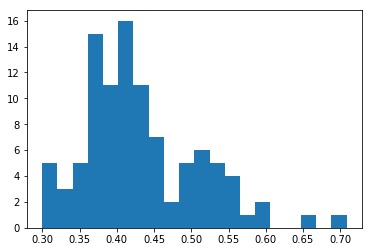

In [136]:
nbins = 20
dataset = 1
hist_data = data.histogram(nbins, dataset)
print(hist_data)